# 2D Flat, Finite Length Vortex Sheet (Panel) of Constant Strength $\gamma$ [m/s]

## This notebook provides an analysis of the following for a 2D flat, finite length vortex sheet of constant strength $\gamma$:

### 1. velocity potential $\phi_{\gamma}$ 

  * $\phi_{\gamma}(x,z)$ = $-\frac{\gamma}{2\pi}\int_{x_1}^{x_2}\tan^{-1}\big [ \frac{z}{x-x_0} \big ] dx_0$

### 2. velocity fields $u_{\gamma}$ & $w_{\gamma}$

  * $u_{\gamma}(x,z)$ = $\frac{\gamma}{2\pi}\int_{x_1}^{x_2}\frac{z}{(x-x_0)^2+z^2}dx_0$
  * $w_{\gamma}(x,z)$ = $-\frac{\gamma}{2\pi}\int_{x_1}^{x_2}\frac{x-x_0}{(x-x_0)^2+z^2}dx_0$
  
Note: the integration limits $x_1$ and $x_2$ are the *vortex panel* **start** and **end** points, respectively

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 1: Importing Packages

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math as math

def gridlines():
        plt.minorticks_on()
        plt.grid(zorder = 0, which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
        plt.grid(zorder = 0, which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.75')
        plt.grid(zorder = 0, which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')
        plt.grid(zorder = 0, which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.75')

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 2: Domain Discretization

#### In this step, the domain on which the velocity potential and velocity fields are computed is discretized and shown in a 2D plot

### Step 2.1: Discretizing the Domain

In [2]:
x1 = 0
x2 = 1
gamma  = 1 # m/s

x = np.linspace(x1-1,x2+1,51)
z = np.linspace(-1,1,50)

colNum = len(x)
rowNum = len(z)
xp, zp = np.meshgrid(x,z)

print ('panel START point =', x1, 'm')
print ('panel END point =', x2, 'm')
print ('Vortex Sheet Strength =', gamma, 'm/s')


panel START point = 0 m
panel END point = 1 m
Vortex Sheet Strength = 1 m/s


### Step 2.2: Plotting the Discretizted Domain

<IPython.core.display.Javascript object>


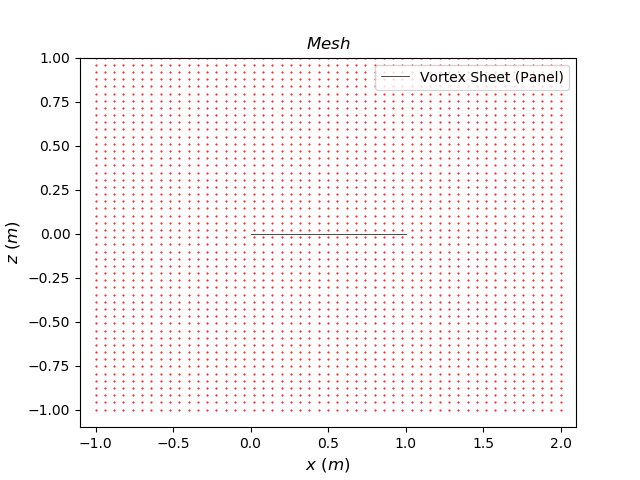

In [3]:
plt.figure(1)
plt.plot(xp,zp,'r.', markersize = 1)
plt.plot([x1,x2],[0,0], 'k-', linewidth = 0.5, label = 'Vortex Sheet (Panel)')
plt.xlabel('$x$ $(m)$', fontsize = 12)
plt.ylabel('$z$ $(m)$',fontsize = 12)
plt.title('$Mesh$',fontsize = 12)
plt.axis([x[0]-0.1,x[-1]+0.1,z[0]-0.1,z[-1]+0.])
plt.legend(loc = 'upper right')

plt.show()

Note: The red points depict the coordinates at which the velocity potential/fields are computed. The black flat plate represents the 2D vortex sheet

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 3: Computing Geometric Parameters

#### In this step, the geomteric parameters $r_1$, $r_2$, $\theta_1$ and $\theta_2$ are computed, where

* $r_k = \sqrt{(x-x_k)^2+z^2}$     for $k = 1,2$
* $\theta_k = tan^{-1}\big[ \frac{z}{x-x_k} \big] $     for $k = 1,2$


In [4]:
r1, r2, theta1, theta2 = [np.zeros((rowNum,colNum)) for i in range(4)]

for i in range(rowNum):
    for j in range(colNum):
        
        #-------------Calcultion-of-Geometrical-Parameters--------------------#
        r1[i,j] = np.sqrt( (xp[i,j]-x1)**2 + zp[i,j]**2 )
        r2[i,j] = np.sqrt( (xp[i,j]-x2)**2 + zp[i,j]**2 )        

        theta1[i,j] = math.atan2(zp[i,j],(xp[i,j]-x1))  
        theta2[i,j] = math.atan2(zp[i,j],(xp[i,j]-x2))
        
        if theta1[i,j] < 0:
            theta1[i,j] = theta1[i,j] + 2*np.pi
        if theta2[i,j] < 0:
            theta2[i,j] = theta2[i,j] + 2*np.pi

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 4: The Velocity Potential  $\phi_{\gamma}$ 

#### In this step, the velocity potential is computed as each grid point and plotted in a 3D interactive plot and a 2D contour plot

### Step 4.1: Computing the Velocity Potential at each gird point

#### Integrated Velocity Potential $\phi_{\gamma}$ 

  * $\phi_{\gamma}(x,z) = -\frac{\lambda}{2\pi} \big [ (x-x_1)\theta_1 - (x-x_2)\theta_2 + \frac{z}{2}ln \frac{r_1^2}{r_2^2} \big] $, where  $r_1$, $r_2$, $\theta_1$ and $\theta_2$ are defined in Step 3


In [5]:
phi = np.zeros((rowNum,colNum))

for i in range(rowNum):
    for j in range(colNum):
       
        #-------------Calcultion-of-Vortex-Potential-Field---------------------------# 
        phi1 = (xp[i,j]-x1)*theta1[i,j]        
        phi2 = (xp[i,j]-x2)*theta2[i,j]        
        phi3 = 0.5*zp[i,j]*math.log( (r1[i,j]**2) / (r2[i,j]**2) ) 
        phi[i,j] = -(gamma/2./np.pi) * ( phi1 - phi2 + phi3 )

### Step 4.2: Plotting the Velocity Potential in a 3D INTERACTIVE plot

<IPython.core.display.Javascript object>


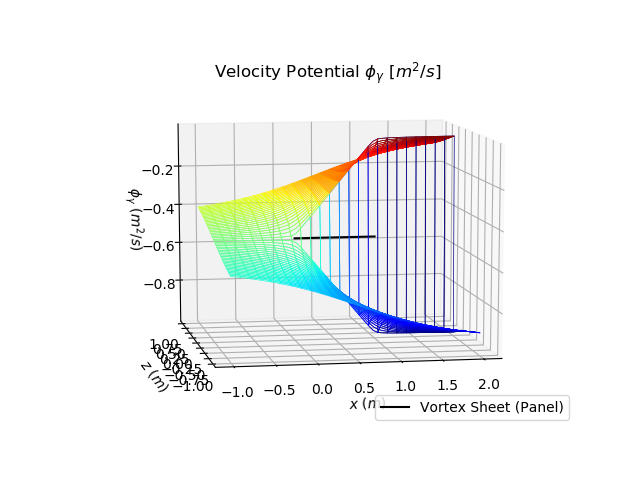

In [6]:
fig = plt.figure(2)

ax = fig.add_subplot(111, projection = '3d')
norm = plt.Normalize(phi.min(),phi.max())
colors = cm.jet(norm(phi))
surf = ax.plot_surface(xp,zp,phi, facecolors = colors, shade = False, linewidth = 0.5)
surf.set_facecolor((0,0,0,0))
ax.plot([x1,x2],[0,0],[0.5*gamma*(x1-x2),0.5*gamma*(x1-x2)], 'k-', label = 'Vortex Sheet (Panel)')
ax.view_init(10, -100)
#ax.set_zlim3d(-0.5,0.5)
ax.set_xlabel("$x$ $(m)$")
ax.set_ylabel("$z$ $(m)$")
ax.set_zlabel("$\phi_{\gamma}$ $(m^2/s)$")
ax.set_title("Velocity Potential $\phi_{\gamma}$ [$m^2/s$]")
ax.legend(loc = 'lower right') 

plt.show()

### Step 4.3: Plotting the Velocity Potential in a 2D contour plot

<IPython.core.display.Javascript object>


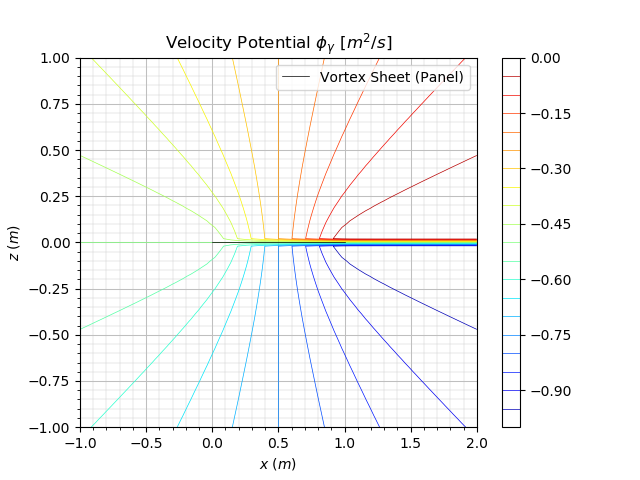

In [7]:
fig = plt.figure(3)

plt.subplot(111)
gridlines()
phi = plt.contour(xp,zp,phi, 20, cmap = cm.jet, linewidths = 0.5)
plt.colorbar(phi)
plt.plot([x1,x2],[0,0], 'k-', linewidth = 0.5, label = 'Vortex Sheet (Panel)')
plt.xlabel("$x$ $(m)$")
plt.ylabel("$z$ $(m)$")
plt.title("Velocity Potential $\phi_{\gamma}$ [$m^2/s$]")
plt.legend()

plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 5: The Velocity Fields  $u_{\lambda}$ & $w_{\lambda}$ 

#### In this step, the velocity fields are computed at each grid point and plotted in a 3D interactive plot and a 2D filled contour plot

### Step 5.1: Computing the  Horizontal Velocity Field $u_{\gamma}$ at each grid point

#### Integrated Horizontal Velocity $u_{\gamma}$

  * $u_{\gamma}(x,z) = \frac{\gamma}{2\pi} (\theta_2 - \theta_1)$, where  $\theta_1$ and $\theta_2$ are defined in Step 3

In [8]:
u = np.zeros((rowNum,colNum))

for i in range(rowNum):
    for j in range(colNum):
       
        #-------------Calcultion-of-u-Velocity-Field---------------------------# 
        u[i,j] = (gamma/2./np.pi)*(theta2[i,j] - theta1[i,j])

### Step 5.2: Plotting the Horizontal Velocity Field  $u_{\lambda}$ in a 3D INTERACTIVE plot

<IPython.core.display.Javascript object>


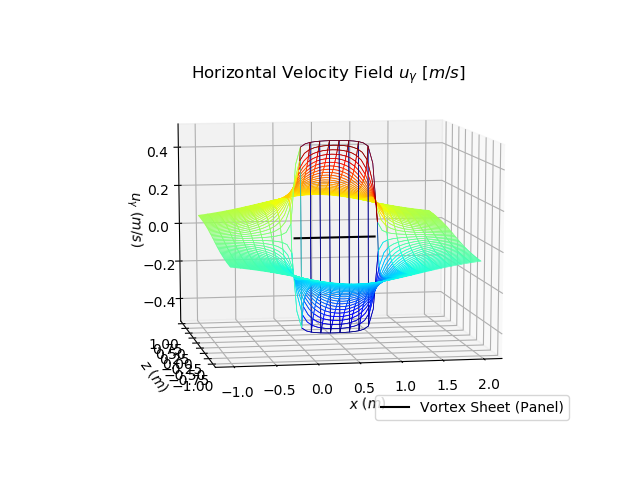

In [9]:
fig = plt.figure(4)

ax = fig.add_subplot(111, projection = '3d')
norm = plt.Normalize(u.min(),u.max())
colors = cm.jet(norm(u))
surf = ax.plot_surface(xp,zp,u, facecolors = colors, shade = False, linewidth = 0.5)
surf.set_facecolor((0,0,0,0))
ax.plot([x1,x2],[0,0],[0,0], 'k-', label = 'Vortex Sheet (Panel)')
ax.view_init(10, -100)
ax.set_zlim3d(-0.5,0.5)
ax.set_xlabel("$x$ $(m)$")
ax.set_ylabel("$z$ $(m)$")
ax.set_zlabel("$u_{\gamma}$ $(m/s)$")
ax.set_title("Horizontal Velocity Field $u_{\gamma}$ [$m/s$]")
ax.legend(loc = 'lower right')

plt.show()

### Step 5.3: Plotting the Horizontal Velocity Field $u_{\lambda}$ in a 2D contour plot

<IPython.core.display.Javascript object>


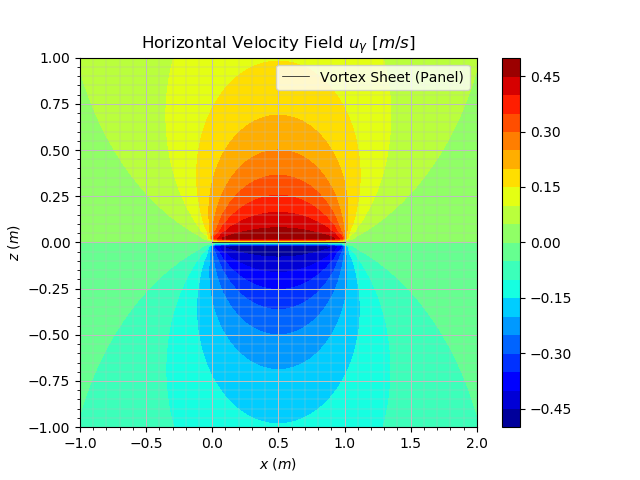

In [10]:
fig = plt.figure(5)

plt.subplot(111)
gridlines()
u = plt.contourf(xp,zp,u, 20, cmap = cm.jet)
plt.colorbar(u)
plt.plot([x1,x2],[0,0], 'k-', linewidth = 0.5, label = 'Vortex Sheet (Panel)')
plt.xlabel("$x$ $(m)$")
plt.ylabel("$z$ $(m)$")
plt.title("Horizontal Velocity Field $u_{\gamma}$ [$m/s$]")
plt.legend()

plt.show()

### Step 5.4: Computing the Vertical Velocity Field $w_{\gamma}$ at each grid point

#### Integrated Vertical Velocity $w_{\gamma}$

  * $w_{\gamma}(x,z) = \frac{\gamma}{4\pi} ln \big [ \frac{r_2^2}{r_1^2} \big ] $, where  $r_1$ and $r_2$ are defined in Step 3
  

In [11]:
w = np.zeros((rowNum,colNum))

for i in range(rowNum):
    for j in range(colNum):
       
        #-------------Calcultion-of-w-Velocity-Field---------------------------# 
        w[i,j] = (gamma/4./np.pi)*math.log( (r2[i,j]**2) / (r1[i,j]**2) )

### Step 5.5: Plotting the Vertical Velocity Field $w_{\lambda}$ in a 3D INTERACTIVE plot

<IPython.core.display.Javascript object>


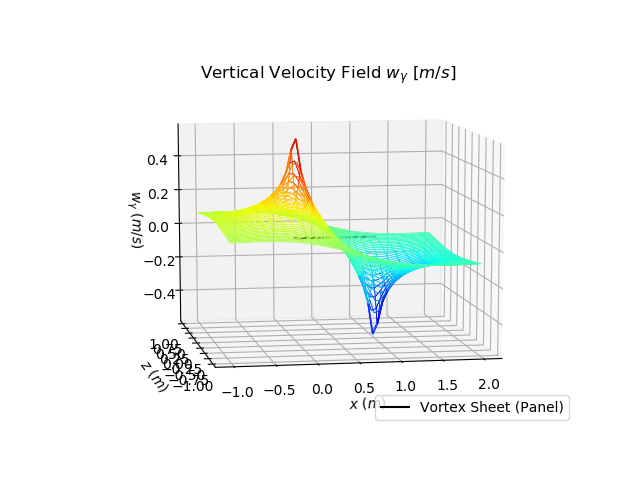

In [12]:
fig = plt.figure(6)

ax = fig.add_subplot(111, projection = '3d')
norm = plt.Normalize(w.min(),w.max())
colors = cm.jet(norm(w))
surf = ax.plot_surface(xp,zp,w, facecolors = colors, shade = False, linewidth = 0.5)
ax.plot([x1,x2],[0,0],[0,0], 'k-', label = 'Vortex Sheet (Panel)')
surf.set_facecolor((0,0,0,0))
ax.view_init(10, -100)
#ax.set_zlim3d(-0.5,0.5)
ax.set_xlabel("$x$ $(m)$")
ax.set_ylabel("$z$ $(m)$")
ax.set_zlabel("$w_{\gamma}$ $(m/s)$")
ax.set_title("Vertical Velocity Field $w_{\gamma}$ [$m/s$]")
ax.legend(loc = 'lower right')

plt.show()

### Step 5.6: Plotting the Vertical Velocity Field $w_{\lambda}$ in a 2D contour plot

<IPython.core.display.Javascript object>


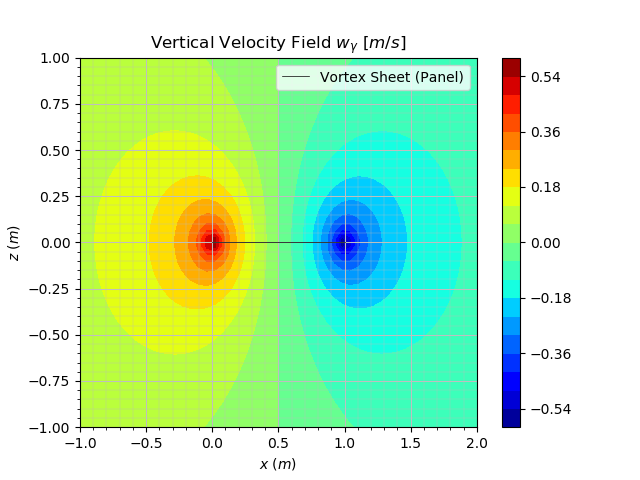

In [13]:
fig = plt.figure(7)

plt.subplot(111)
gridlines()
w = plt.contourf(xp,zp,w, 20, cmap = cm.jet)
plt.colorbar(w)
plt.plot([x1,x2],[0,0], 'k-', linewidth = 0.5, label = 'Vortex Sheet (Panel)')
plt.xlabel("$x$ $(m)$")
plt.ylabel("$z$ $(m)$")
plt.title("Vertical Velocity Field $w_{\gamma}$ [$m/s$]")
plt.legend()

plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Step 6: The Velocity Potential $\phi_{\lambda}$ and the Velocity Fields  $u_{\lambda}$ & $w_{\lambda}$ at the Sheet (z = 0$\pm$, $x_1 < x < x_2$) 


In [14]:
x_sheet = np.linspace(x1+(x2-x1)/1000,x2-(x2-x1)/1000,100)

### Step 6.1: Computing the Velocity Potential $\phi_{\gamma}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

#### Integrated Velocity Potential $\phi_{\gamma}$ evaluated at the Sheet 

  * $\phi_{\gamma}(x,0+) = \frac{\gamma}{2} (x-x_2) $ for $x_1 < x < x_2$
  * $\phi_{\gamma}(x,0-) = -\frac{\gamma}{2} (x+x_2-2x_1) $ for $x_1 < x < x_2$
  * $\Delta\phi_{\gamma}(x) = \phi_{\gamma}(x,0+)- \phi_{\gamma}(x,0-)= \frac{\gamma}{2} (x-x_1) $ for $x_1 < x < x_2$
  
Note: $\phi_{\gamma}(x,0\pm)$ is **discontinuous** *across sheet*!

In [15]:
phi_sheet_plus = np.zeros(len(x_sheet))
phi_sheet_minus = np.zeros(len(x_sheet))
phi_sheet_diff = np.zeros(len(x_sheet))

for i in range(len(x_sheet)):
    phi_sheet_plus[i] = 0.5*gamma*(x_sheet[i]-x2)
    phi_sheet_minus[i] = -0.5*gamma*(x_sheet[i]+x2-2*x1)
    phi_sheet_diff[i] =  gamma*(x_sheet[i]-x1)

### Step 6.2: Plotting the Velocity Potential $\phi_{\lambda}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

<IPython.core.display.Javascript object>


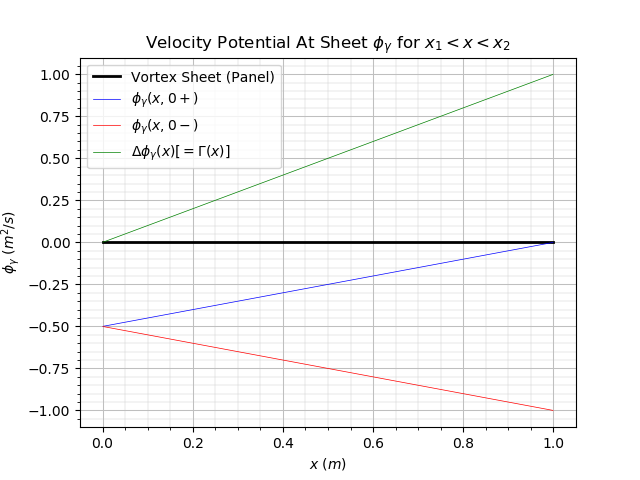

In [16]:
plt.figure(8)
gridlines()
plt.plot([x1,x2],[0,0], 'k-', linewidth = 2, label = 'Vortex Sheet (Panel)')
plt.plot(x_sheet,phi_sheet_plus, 'b-', linewidth = 0.5, label = '$\phi_{\gamma}(x, 0+)$')
plt.plot(x_sheet,phi_sheet_minus, 'r-', linewidth = 0.5, label = '$\phi_{\gamma}(x, 0-)$')
plt.plot(x_sheet,phi_sheet_diff, 'g-', linewidth = 0.5, label = '$\Delta\phi_{\gamma}(x)[=\Gamma(x)]$')
plt.xlabel('$x$ $(m)$')
plt.ylabel('$\phi_{\gamma}$ $(m^2/s)$')
plt.title('Velocity Potential At Sheet $\phi_{\gamma}$ for $x_1<x<x_2$')
plt.legend()
plt.show()

### Step 6.3: Computing the Horizontal Velocity $u_{\gamma}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

#### Integrated Horizontal Velocity $u_{\gamma}$ evaluated at the Sheet 

  * $u_{\gamma}(x,0\pm) = \pm \frac{\gamma}{2}  $ for $x_1 < x < x_2$
  
Note: $u_{\gamma}(x,0\pm)$ is **discontinuous** *across sheet*! (i.e. there is a **velocity jump**)

In [17]:
u_sheet_top = np.zeros(len(x_sheet))
u_sheet_bot = np.zeros(len(x_sheet))

for i in range(len(x_sheet)):
    u_sheet_top[i] = gamma/2
    u_sheet_bot[i] = -gamma/2

### Step 6.4: Plotting the Horizontal Velocity $u_{\lambda}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

<IPython.core.display.Javascript object>


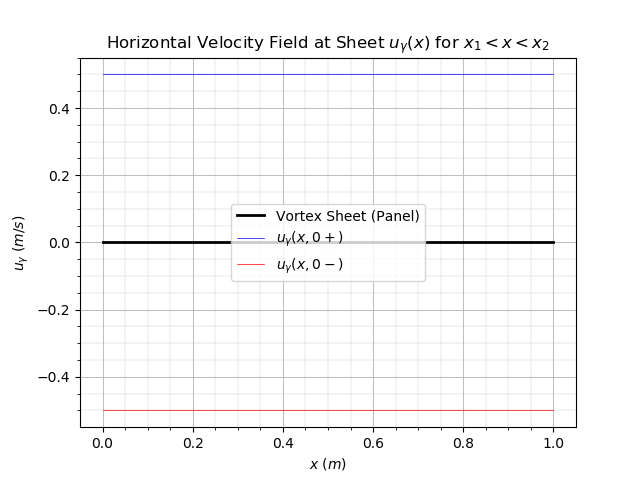

In [18]:
plt.figure(9)
gridlines()
plt.plot([x1,x2],[0,0], 'k-', linewidth = 2, label = 'Vortex Sheet (Panel)')
plt.plot(x_sheet,u_sheet_top, 'b-', linewidth = 0.5, label = '$u_{\gamma}(x, 0+)$')
plt.plot(x_sheet,u_sheet_bot, 'r-', linewidth = 0.5, label = '$u_{\gamma}(x, 0-)$')
plt.xlabel('$x$ $(m)$')
plt.ylabel('$u_{\gamma}$ $(m/s)$')
plt.title('Horizontal Velocity Field at Sheet $u_{\gamma}(x)$ for $x_1<x<x_2$')
plt.legend()
plt.show()

### Step 6.5: Computing the Vertical Velocity $w_{\gamma}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

#### Integrated Vertical Velocity $w_{\gamma}$ evaluated at the Sheet 

  * $w_{\gamma}(x,0\pm) = \frac{\gamma}{4 \pi} ln \bigg [ \frac{(x-x_2)^2}{(x-x_1)^2} \bigg ]$
  
Note: $w_{\gamma}(x,0\pm)$ is **continuous** *across sheet*! 

In [19]:
w_sheet = np.zeros(len(x_sheet))

for i in range(len(x_sheet)):
    w_sheet_1 = (x_sheet[i]-x1)**2 
    w_sheet_2 = (x_sheet[i]-x2)**2
    w_sheet[i] = (gamma/4/np.pi)*(math.log(w_sheet_2/w_sheet_1))


### Step 6.4: Plotting the Vertical Velocity $w_{\lambda}$ at the Sheet  (z = 0$\pm$, $x_1 < x < x_2$) 

<IPython.core.display.Javascript object>


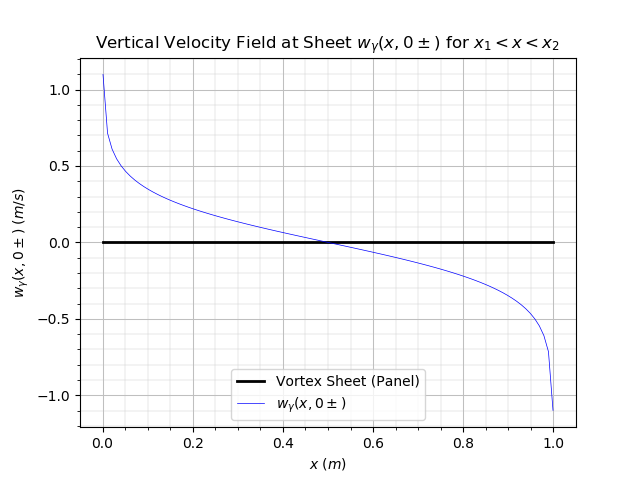

In [20]:
plt.figure(10)
gridlines()
plt.plot([x1,x2],[0,0], 'k-', linewidth = 2, label = 'Vortex Sheet (Panel)')
plt.plot(x_sheet,w_sheet, 'b-', linewidth = 0.5, label = '$w_{\gamma}(x, 0\pm)$')
plt.xlabel('$x$ $(m)$')
plt.ylabel('$w_{\gamma}(x, 0\pm)$ $(m/s)$')
plt.title('Vertical Velocity Field at Sheet $w_{\gamma}(x, 0\pm)$ for $x_1<x<x_2$')
plt.legend(loc = 'lower center')
plt.show()